In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib notebook

## Schrodinger Equation
Here is the Hamiltonian for a single particle in 1D:
$$ H = \frac{p^2}{2m}+V $$
In real space, it acts on the wavefunction as:
$$ H\psi(x) = -\frac{\hbar^2}{2m} \frac{d^2}{dx^2}\psi(x) + V(x)\psi(x)$$
If we discretize space and use the finite difference approximation for the second derivative, we have:
$$ H\psi(x_i) = -\frac{1}{2}\frac{\psi(x_i+\Delta x)-2\psi(x_i) + \psi(x_i-\Delta x)}{\Delta x^2} + V(x_i)\psi(x_i) $$
Or, since $x_{i+1}=x_i+\Delta x$, we have:
$$ H\psi(x_i) = -\frac{1}{2}\frac{\psi(x_{i+1})-2\psi(x_i) + \psi(x_{i-1})}{\Delta x^2} + V(x_i)\psi(x_i) $$
We can view this as a matrix equation:
$$H\vec{\psi}=-\frac{1}{2}\frac{1}{\Delta x^2}\begin{bmatrix}-2 & 1 & 0 & ...\\1 & -2 & 1 & ... \\ & & ... & \\ ... & 0 & 1 & -2 \end{bmatrix} \begin{bmatrix} \psi(x_0) \\ \psi(x_1) \\ ... \\ \psi(x_{n-1})\end{bmatrix} + \begin{bmatrix}V(x_0) &  0 & 0 & ...\\0 & V(x_1) & 0 & ... \\ & & ... & \\ ... & 0 & 0 & V(x_{n-1}) \end{bmatrix} \begin{bmatrix} \psi(x_0) \\ \psi(x_1) \\ ... \\ \psi(x_{n-1})\end{bmatrix}$$
If we want to find the stationary states for the Hamiltonian, then we just need to find the eigenenergies and eigenstates (vectors) for the matrix $H$.
$$H\vec{\psi}_i=E_i \vec{\psi}_i $$

## Potential
We'll solve this system for a perturbed simple harmonic oscillator potential:
$$ V(x) = V(x,\omega, \epsilon) = \frac{1}{2}\omega^2 x^2 + \epsilon \theta(-x)$$
For $\epsilon=0$, we should recover the SHO solutions, and as $\epsilon \rightarrow \infty$, we should recover the solutions to the half-harmonic oscillator.

## Define our potential and matrices

In [119]:
# Get the potential V(x)
def V(x, omega, epsilon):
    mask = np.zeros_like(x)
    mask[x<0] = 1
    return 0.5*omega**2*x**2 + epsilon*mask

# Get the matrix representing V
def V_matrix(x, omega, epsilon):
    size = len(x)
    V_mat = np.zeros(shape=(size,size))
    for i in range(0, size):
        V_mat[i,i] = V(x[i], omega, epsilon)
    return V_mat

# Get the matrix representing the finite difference d**2/dx**2
def second_deriv(x):
    size = len(x)
    dx = x[1]-x[0]
    d2_mat = np.zeros(shape=(size,size))
    for i in range(0, size):
        d2_mat[i,i] = -2
        if(i-1 >= 0):
            d2_mat[i-1,i] = 1
        if(i+1 < size):
            d2_mat[i+1,i] = 1
    
    d2_mat /= dx**2
    return d2_mat
    

## Find the eigenvalues and eigenvectors

In [132]:
x = np.arange(-10,10,0.1)   #Setup our discretized space

H = -0.5*second_deriv(x) + V_matrix(x,1,0)  # Construct our Hamiltonian
Vs = V(x,1,0)   # Get the potential for plotting
print("H = ",H)
print("Shape of H = ", H.shape)
(evals, evecs) = np.linalg.eigh(H)
print('Energies = ', evals[0:5],"...")

H =  [[ 150.     -50.       0.    ...,    0.       0.       0.   ]
 [ -50.     149.005  -50.    ...,    0.       0.       0.   ]
 [   0.     -50.     148.02  ...,    0.       0.       0.   ]
 ..., 
 [   0.       0.       0.    ...,  147.045  -50.       0.   ]
 [   0.       0.       0.    ...,  -50.     148.02   -50.   ]
 [   0.       0.       0.    ...,    0.     -50.     149.005]]
Shape of H =  (200, 200)
Energies =  [ 0.4996873   1.49843574  2.49593063  3.49216962  4.48715031] ...


## Plot the first five energy levels

<IPython.core.display.Javascript object>


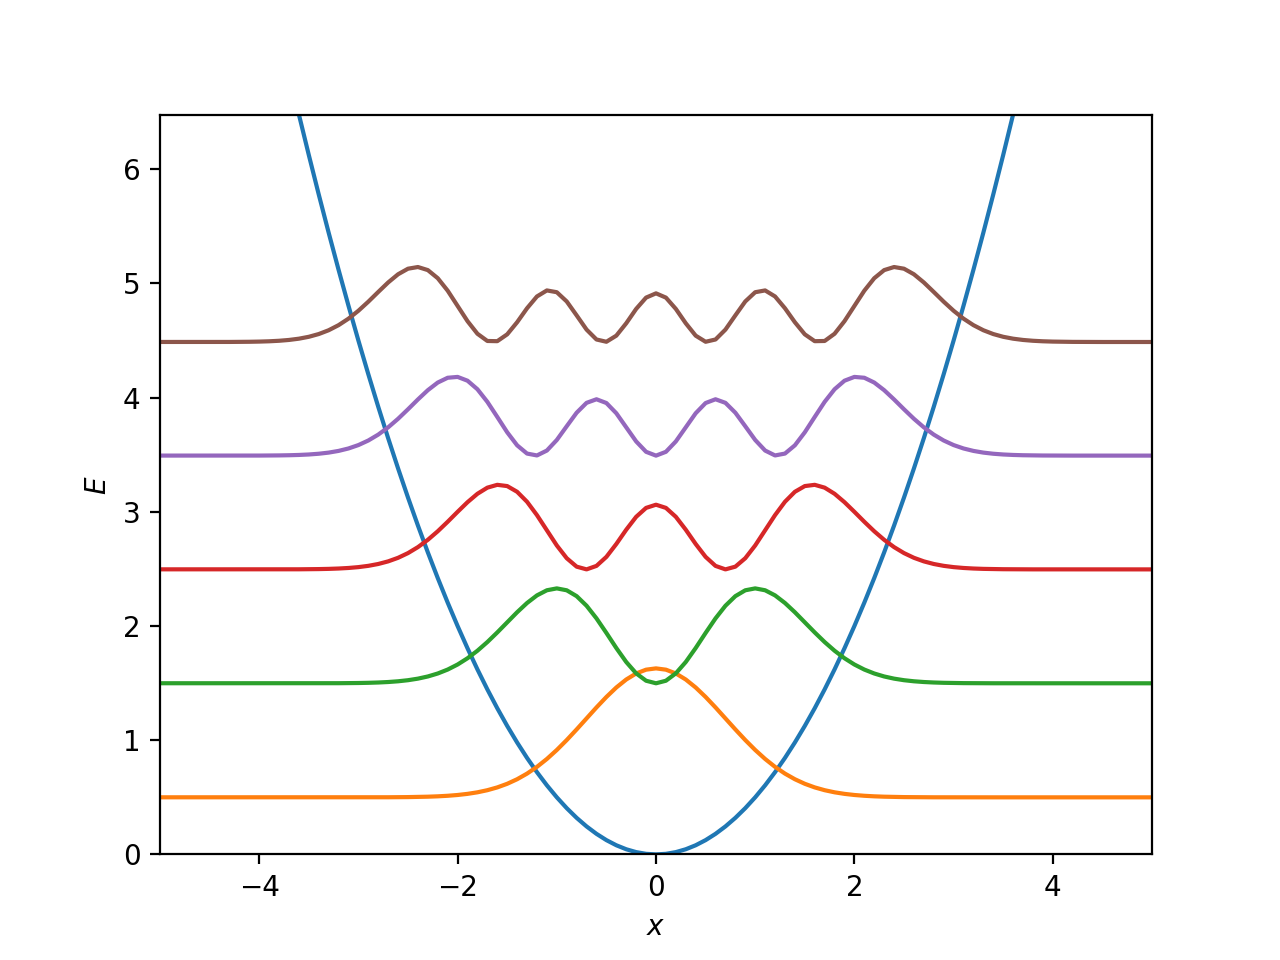

Ground State Norm =  1.0


In [133]:
plt.figure()
plt.plot(x, Vs)
scaling=20
print("Ground State Norm = ", np.dot(evecs[:,0],evecs[:,0]))
for i in range(0,5):
    plt.plot(x, scaling*evecs[:,i]*evecs[:,i]+evals[i])
plt.ylim([0,evals[6]])
plt.xlim([-5,5])
plt.xlabel(r'$x$')
plt.ylabel(r'$E$')
plt.show()

<IPython.core.display.Javascript object>


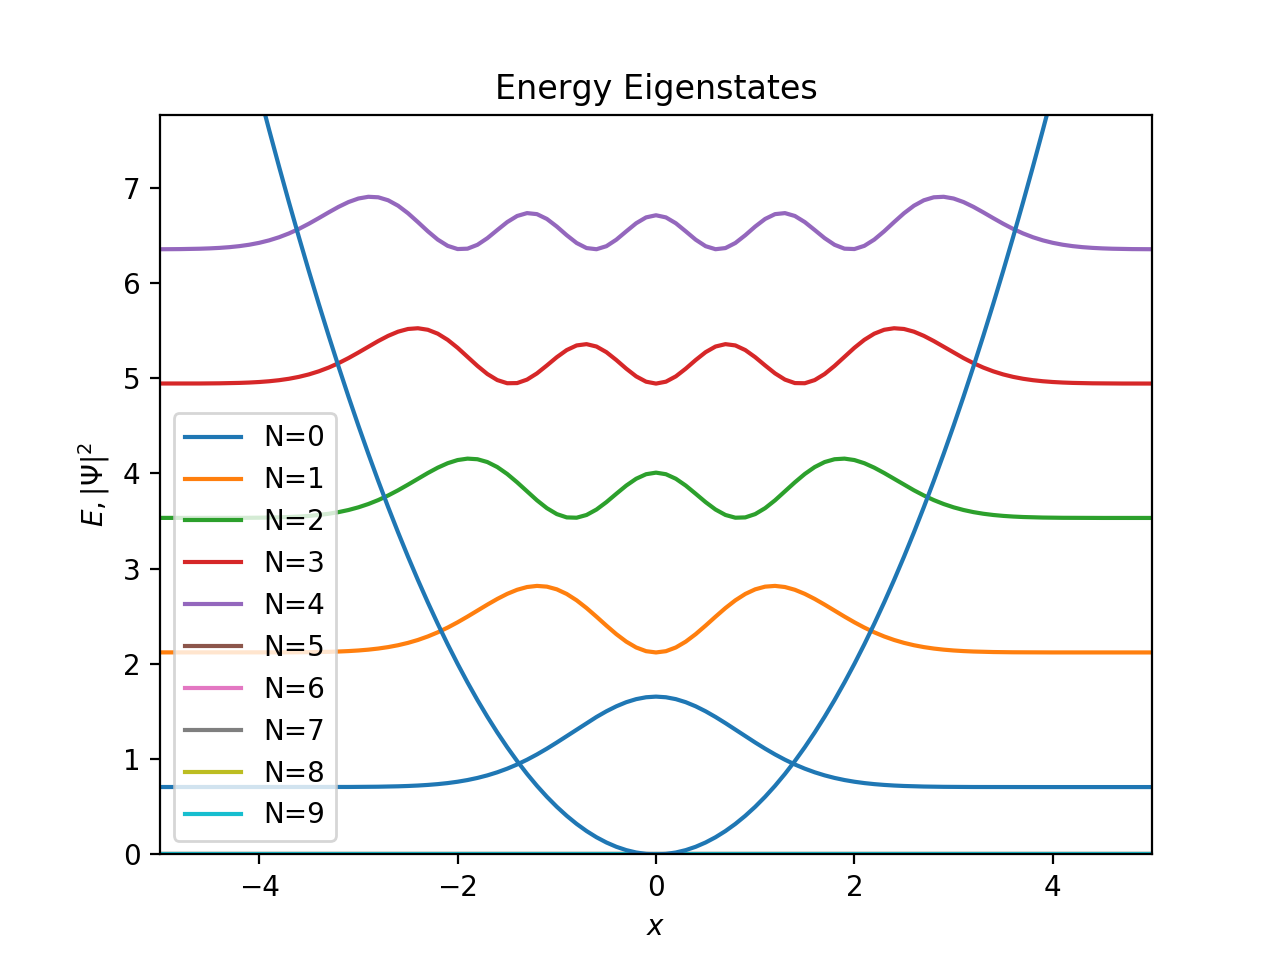

interactive(children=(FloatSlider(value=1.0, description='$\\omega$', max=5.0, min=0.2, step=0.2), FloatSlider…

In [142]:
scaling = 20
def solve_SHO(omega, epsilon):
    x = np.arange(-10,10,0.1)
    H = -second_deriv(x) + V_matrix(x, omega, epsilon)
   # Vs = V(x)
    (evals, evecs) = np.linalg.eigh(H)
    return (evals, evecs)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
(evals, evecs) = solve_SHO(1,0)
max_N = 10
lines=[]
for i in range(0, max_N):
    line, = ax.plot(x, scaling*evecs[:,i]*evecs[:,i]+evals[i], label='N='+str(i))
    lines.append(line)
    
V_line, = ax.plot(x, V(x,1,0))
    
plt.legend(loc=3)
plt.xlabel(r'$x$')
plt.ylabel(r'$E,|\Psi|^2$')
plt.title('Energy Eigenstates')
plt.ylim([0,evals[max_N]])
plt.xlim([-5,5])

def update(omega=1, epsilon=0, max_N=5):
    (evals, evecs) = solve_SHO(omega, epsilon)
    for i in range(0, max_N):
        line = lines[i]
        line.set_ydata(scaling*evecs[:,i]*evecs[:,i]+evals[i])
    for i in range(max_N,10):
        line = lines[i]
        line.set_ydata(0*evecs[:,i])
    V_line.set_ydata(V(x,omega, epsilon))
    plt.ylim([0,evals[max_N]])
    fig.canvas.draw()

#interact(update, dt=(0.1,5,0.1), lambda_=(0.1,1,0.05));
interact(update, omega=widgets.FloatSlider(min=0.2,max=5,step=0.2,value=1, description=r'$\omega$'),
        epsilon=widgets.FloatSlider(min=0.0,max=20,step=1,value=0, description=r'$\epsilon$'),
        max_N=widgets.BoundedIntText(value=5, min=1, max=10, step=1, description=r'$N_{max}$', disabled=False));